<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

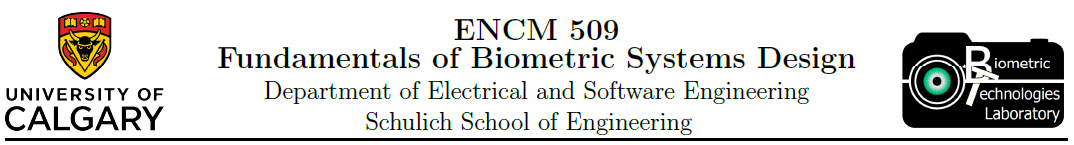

## Lab 3:

* Team member - Abid Al Labib 
    - UCID: 30070079
* Team member - Madhu Selvaraj
    - UCID: 30061979
    

## Introduction:
In this lab we took a look at how changing the number of training components can affect the results of a Gaussian Mixture model. 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

## Exercise 1

In [8]:
#loading the data

# data folder:
base_dir = './sig_vals/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'g'
dir_impostor = base_dir + 'i'
dir_words = base_dir + 'w'
# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30
# lists to store the loaded signatures
auth_lst = []
imp_lst = []
words_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))
    csv_words = pd.read_csv(dir_words + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values) #ndarray
    imp_lst.append(csv_imp.values)
    words_lst.append(csv_words.values)


In [9]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = [20,25]

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = [20,60]


In [10]:
gmmList = []

#need to change this so one of the params stays constant while the other changes....don't modify both at same time...
#4 comparisions in total
for p in range(0,len(NUMTRAININGPATTERNS)):
    print('The number of signatures for training is the first %d signatures from the set,' % (NUMTRAININGPATTERNS[p] ))
    print('and the number of Gaussian mixture components is %d' % (NUMGCOMPONENTS[p]))

    # usually we don't know the final size of train_set because each signature has different number of points. 
    # to later on use 'concatenate', is necessary to take the first sample outside the loop
    train_set = np.reshape(auth_lst[0], (-1,4)) #first sample (1.csv), (-1,4) = unknown number of rows and 4 columns

    # this matrix, stored in the varaible "train_set" will be used for the training
    for i in range(1,NUMTRAININGPATTERNS[p]):
        sample = np.reshape(auth_lst[i], (-1,4)) #getting the next sample from auth_list
        train_set = np.concatenate((train_set, sample), axis=0) #concatenating the samples

    # Training the GaussianMixture model
    gmm = GaussianMixture(n_components=NUMGCOMPONENTS[p]).fit(train_set)
    gmmList.append(gmm)

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 20
The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 60


The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.3912
Average of forgery scores: -53.2342
Deviation of authentic scores: 0.3442
Deviation of forgery scores: 53.2885


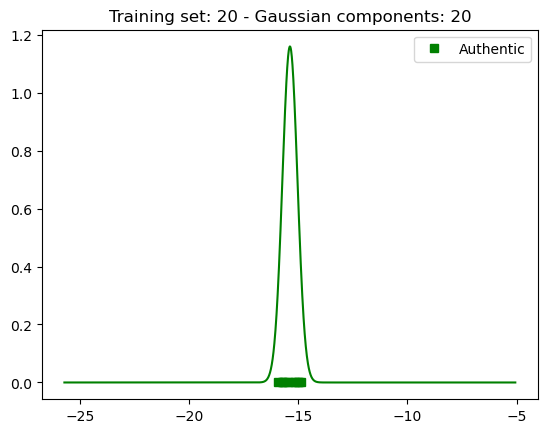

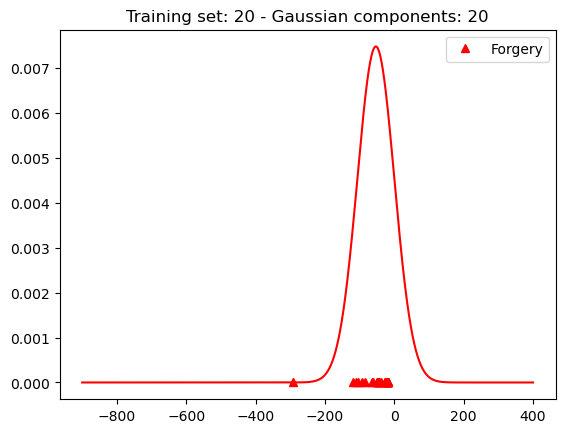

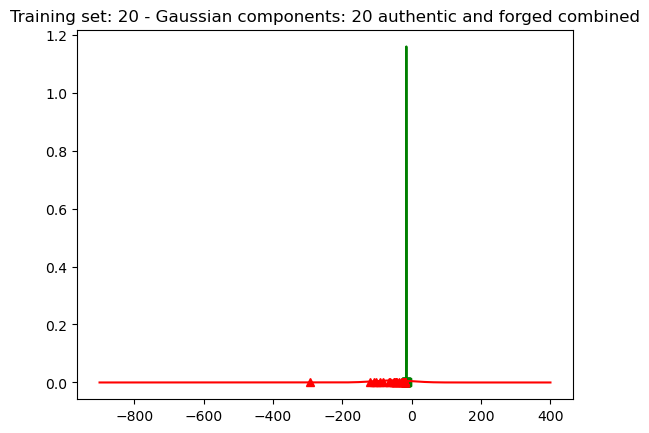

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -15.5463
Average of forgery scores: -119.3216
Deviation of authentic scores: 0.9465
Deviation of forgery scores: 161.0120


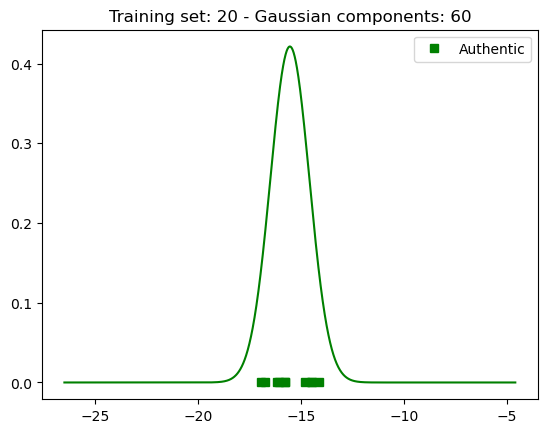

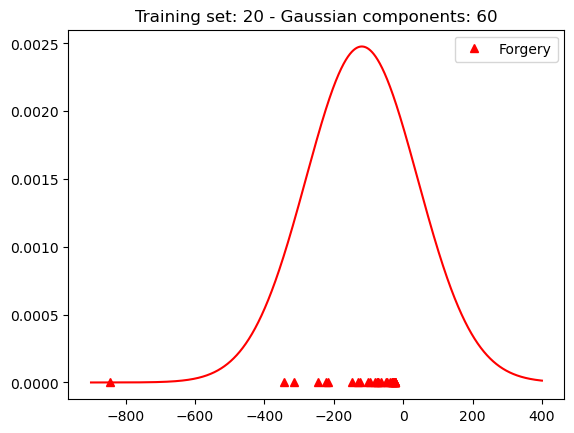

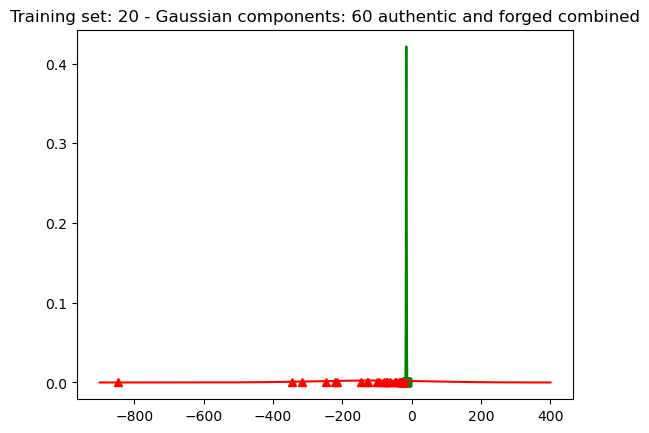

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -14.9372
Average of forgery scores: -35.1246
Deviation of authentic scores: 0.3420
Deviation of forgery scores: 29.3953


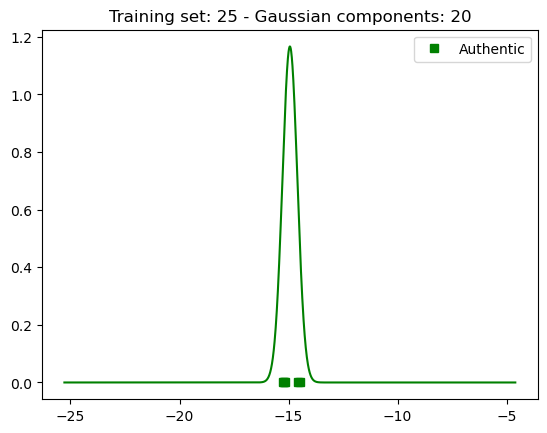

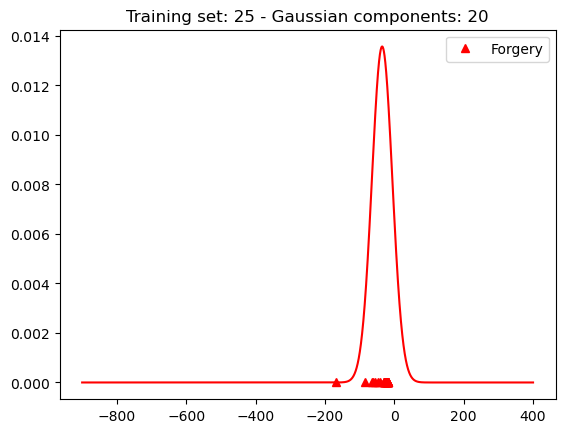

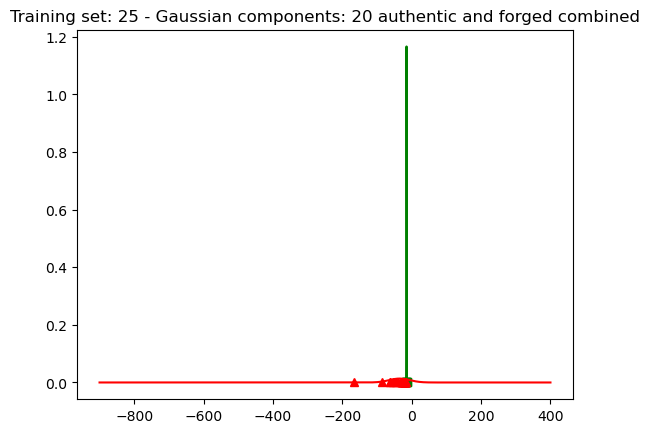

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -14.9289
Average of forgery scores: -132.2844
Deviation of authentic scores: 0.8066
Deviation of forgery scores: 189.0744


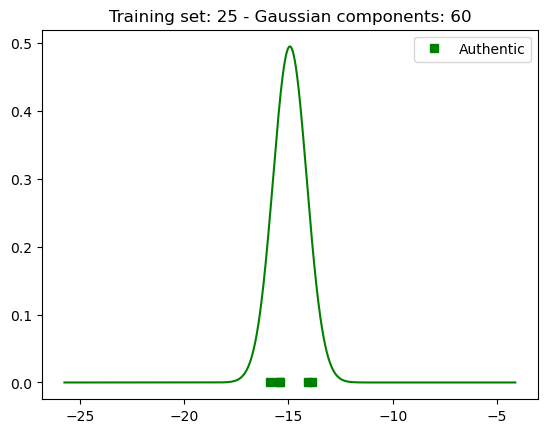

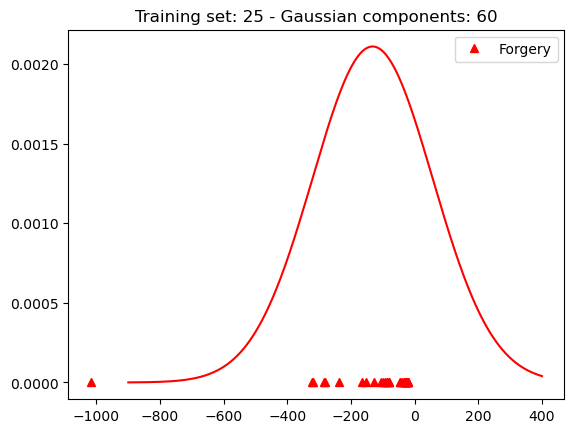

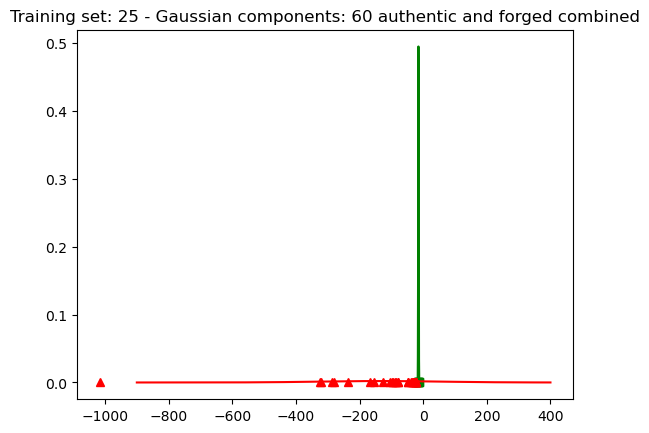

In [31]:
gmmList = []
g_mean_list = []
for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
        print('The number of signatures for training is the first %d signatures from the set,' % (ntp ))
        print('and the number of Gaussian mixture components is %d' % (ngc))
        
        train_set = np.reshape(auth_lst[0], (-1,4))
        for i in range(1,ntp):
            sample = np.reshape(auth_lst[i], (-1,4)) #getting the next sample from auth_list
            train_set = np.concatenate((train_set, sample), axis=0) #concatenating the samples
        
        gmm = GaussianMixture(n_components=ngc).fit(train_set)
        #gmmList.append(gmm)


        # to store all the scores calculated
        aScores = [] 
        fScores = []
        #gmm = gmmList[g]

        # Testing the GaussianMixture model with remaining genuine signatures (10 in total)
        for i in range(ntp, total_signatures):
            sample =  np.reshape(auth_lst[i], (-1,4)) # taking from authentic/genuine samples

            score = gmm.score(sample) # compute the per-sample average log-likelihood of the given data
            aScores.append(score) # add the score calculated to the list aScores

        # Testing the GaussianMixture model with forged signatures (30 in total)
        for i in range(numForgedSigs):
            sample =  np.reshape(imp_lst[i], (-1,4)) # taking from the impostor samples

            score = gmm.score(sample)
            fScores.append(score)

        #calculating the mean and std
        # authentic set
        aMu = np.mean(aScores)
        aStd = np.std(aScores)

        # impostor set
        fMu = np.mean(fScores)
        fStd = np.std(fScores)

        print('Average of authentic scores: %.4f' % (aMu))
        print('Average of forgery scores: %.4f' % (fMu))

        print('Deviation of authentic scores: %.4f' % (aStd))
        print('Deviation of forgery scores: %.4f' % (fStd))


        #PDF of the genuine and imposter samples

        x = np.arange(-60, 0, 0.01) # change this range for your set

        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        # plt.plot(x, aProb, 'g')
        # plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        # plt.plot(x, fProb, 'r')
        # plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        # plt.legend()

        # plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS[g], NUMGCOMPONENTS[g]))

        #plot all param combinations....
        # plt.figure(figsize=(10,4))

        #Authentic set
        x = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        aProb = norm.pdf(x, loc=aMu, scale=aStd)

        # plt.subplot(1,2,1)
        plt.plot(x, aProb, 'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.legend()

        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()

        # Forged (impostor) set
        x = np.arange(-900, 400, 0.01)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        # plt.subplot(1,2,2)
        plt.plot(x, fProb, 'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.legend();
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()   
        
        x_a = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        x_f = np.arange(-900, 400, 0.01)
        plt.plot(x_a,aProb,'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.plot(x_f,fProb,'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.title('Training set: {} - Gaussian components: {} authentic and forged combined'.format(ntp, ngc))
        plt.show()

In [23]:
#loop through the gmm models created with different parameters and display plots
for g in range(0,len(gmmList)):
    # to store all the scores calculated
    aScores = [] 
    fScores = []
    gmm = gmmList[g]

    # Testing the GaussianMixture model with remaining genuine signatures (10 in total)
    for i in range(NUMTRAININGPATTERNS[g], total_signatures):
        sample =  np.reshape(auth_lst[i], (-1,4)) # taking from authentic/genuine samples
        
        score = gmm.score(sample) # compute the per-sample average log-likelihood of the given data
        aScores.append(score) # add the score calculated to the list aScores

    # Testing the GaussianMixture model with forged signatures (30 in total)
    for i in range(numForgedSigs):
        sample =  np.reshape(imp_lst[i], (-1,4)) # taking from the impostor samples

        score = gmm.score(sample)
        fScores.append(score)

    #calculating the mean and std
    # authentic set
    aMu = np.mean(aScores)
    aStd = np.std(aScores)

    # impostor set
    fMu = np.mean(fScores)
    fStd = np.std(fScores)

    print('Average of authentic scores: %.4f' % (aMu))
    print('Average of forgery scores: %.4f' % (fMu))

    print('Deviation of authentic scores: %.4f' % (aStd))
    print('Deviation of forgery scores: %.4f' % (fStd))


    #PDF of the genuine and imposter samples

    x = np.arange(-60, 0, 0.01) # change this range for your set

    aProb = norm.pdf(x, loc=aMu, scale=aStd)
    fProb = norm.pdf(x, loc=fMu, scale=fStd)

    # plt.plot(x, aProb, 'g')
    # plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
    # plt.plot(x, fProb, 'r')
    # plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
    # plt.legend()

    # plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS[g], NUMGCOMPONENTS[g]))

    #plot all param combinations....
    # plt.figure(figsize=(10,4))

    #Authentic set
    x = np.arange(-20, -14, 0.01)
    aProb = norm.pdf(x, loc=aMu, scale=aStd)

    # plt.subplot(1,2,1)
    plt.plot(x, aProb, 'g')
    plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
    plt.legend()
  
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS[g], NUMGCOMPONENTS[g]))
    plt.show()

    # Forged (impostor) set
    x = np.arange(-900, 400, 0.01)
    fProb = norm.pdf(x, loc=fMu, scale=fStd)

    # plt.subplot(1,2,2)
    plt.plot(x, fProb, 'r')
    plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
    plt.legend();
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS[g], NUMGCOMPONENTS[g]))
    plt.show()
    
   
    

## Exercise 2

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.4184
Average of second set of forgery scores: -23.9751
Deviation of authentic scores: 0.5331
Deviation of second set of forgery scores: 4.5767


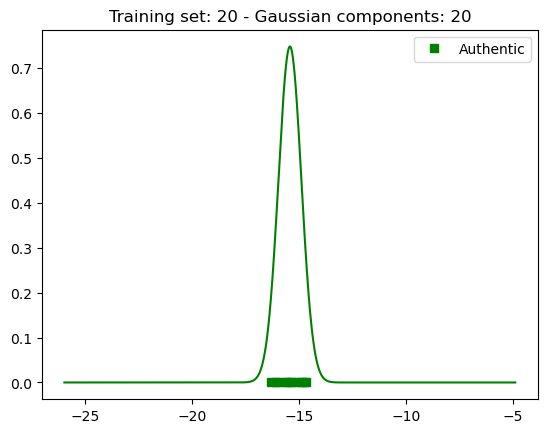

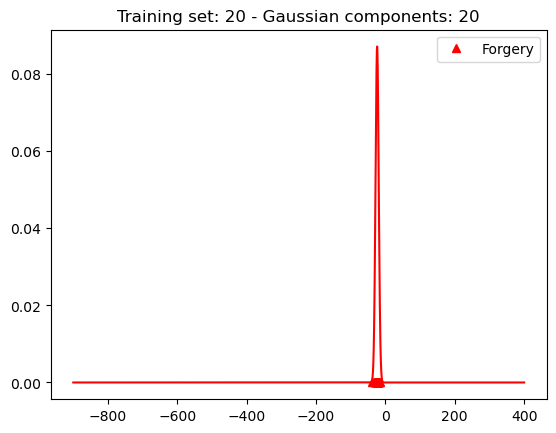

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -15.6855
Average of second set of forgery scores: -76.8447
Deviation of authentic scores: 0.9815
Deviation of second set of forgery scores: 122.2719


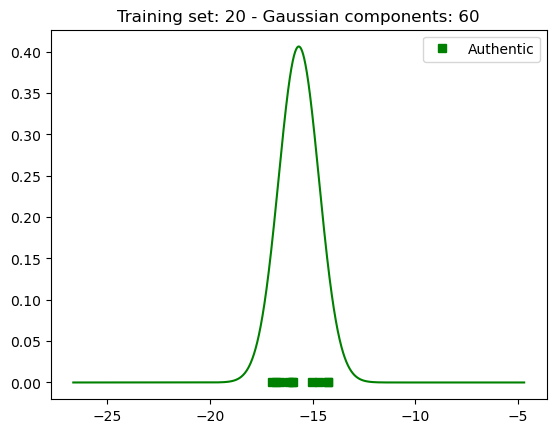

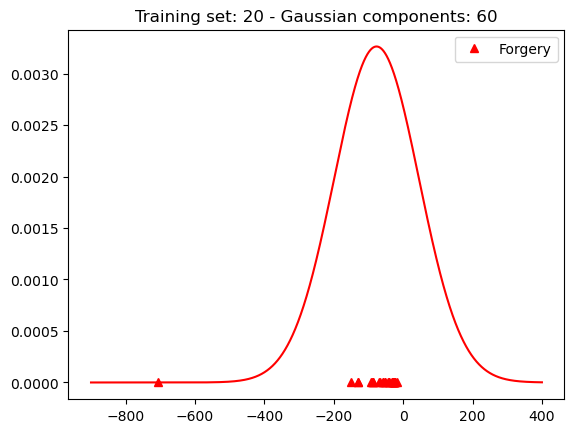

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -14.9192
Average of second set of forgery scores: -28.9182
Deviation of authentic scores: 0.6482
Deviation of second set of forgery scores: 12.7182


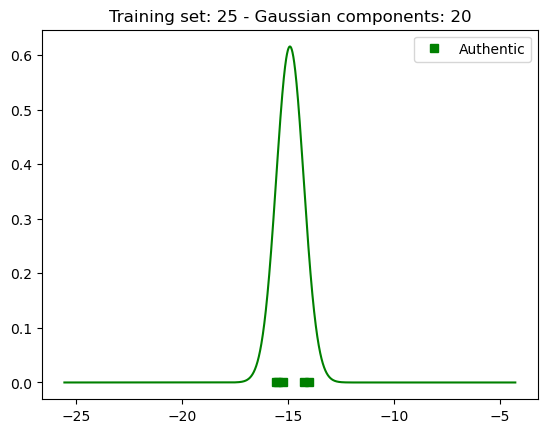

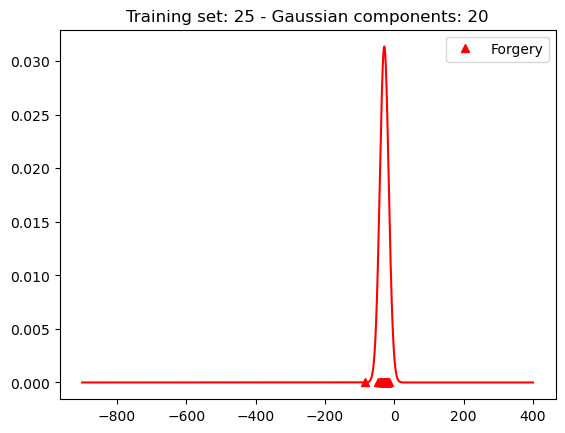

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -14.9791
Average of second set of forgery scores: -72.9903
Deviation of authentic scores: 0.8542
Deviation of second set of forgery scores: 88.4783


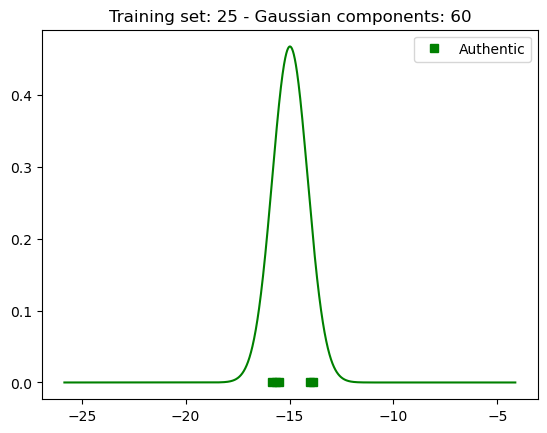

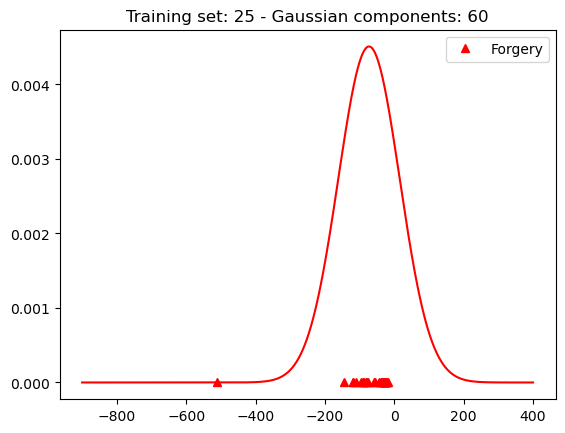

In [19]:
gmmList = []

for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
        print('The number of signatures for training is the first %d signatures from the set,' % (ntp ))
        print('and the number of Gaussian mixture components is %d' % (ngc))
        
        train_set = np.reshape(auth_lst[0], (-1,4))
        for i in range(1,ntp):
            sample = np.reshape(auth_lst[i], (-1,4)) #getting the next sample from auth_list
            train_set = np.concatenate((train_set, sample), axis=0) #concatenating the samples
        
        gmm = GaussianMixture(n_components=ngc).fit(train_set)
        #gmmList.append(gmm)


        # to store all the scores calculated
        aScores = [] 
        fScores = []
        #gmm = gmmList[g]

        # Testing the GaussianMixture model with remaining genuine signatures (10 in total)
        for i in range(ntp, total_signatures):
            sample =  np.reshape(auth_lst[i], (-1,4)) # taking from authentic/genuine samples

            score = gmm.score(sample) # compute the per-sample average log-likelihood of the given data
            aScores.append(score) # add the score calculated to the list aScores

        # Testing the GaussianMixture model with forged signatures (30 in total)
        for i in range(numForgedSigs):
            sample =  np.reshape(words_lst[i], (-1,4)) # taking from the impostor samples

            score = gmm.score(sample)
            fScores.append(score)

        #calculating the mean and std
        # authentic set
        aMu = np.mean(aScores)
        aStd = np.std(aScores)

        # impostor set
        fMu = np.mean(fScores)
        fStd = np.std(fScores)

        print('Average of authentic scores: %.4f' % (aMu))
        print('Average of second set of forgery scores: %.4f' % (fMu))

        print('Deviation of authentic scores: %.4f' % (aStd))
        print('Deviation of second set of forgery scores: %.4f' % (fStd))


        #PDF of the genuine and imposter samples

        x = np.arange(-60, 0, 0.01) # change this range for your set

        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        # plt.plot(x, aProb, 'g')
        # plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        # plt.plot(x, fProb, 'r')
        # plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        # plt.legend()

        # plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS[g], NUMGCOMPONENTS[g]))

        #plot all param combinations....
        # plt.figure(figsize=(10,4))

        #Authentic set
        x = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        aProb = norm.pdf(x, loc=aMu, scale=aStd)

        # plt.subplot(1,2,1)
        plt.plot(x, aProb, 'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.legend()

        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()

        # Forged (impostor) set
        x = np.arange(-900, 400, 0.01)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        # plt.subplot(1,2,2)
        plt.plot(x, fProb, 'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.legend();
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show() 

In [ ]:
g_mean_list = []
g_std_list = []
for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
#         print('The number of signatures for training is the first %d signatures from the set,' % (ntp ))
#         print('and the number of Gaussian mixture components is %d' % (ngc))
        
        train_set = np.reshape(auth_lst[0], (-1,4))
        for i in range(1,ntp):
            sample = np.reshape(auth_lst[i], (-1,4)) #getting the next sample from auth_list
            train_set = np.concatenate((train_set, sample), axis=0) #concatenating the samples
        
        gmm = GaussianMixture(n_components=ngc).fit(train_set)
        #gmmList.append(gmm)


        # to store all the scores calculated
        aScores = [] 

        #gmm = gmmList[g]

        # Testing the GaussianMixture model with remaining genuine signatures (10 in total)
        for i in range(ntp, total_signatures):
            sample =  np.reshape(auth_lst[i], (-1,4)) # taking from authentic/genuine samples

            score = gmm.score(sample) # compute the per-sample average log-likelihood of the given data
            aScores.append(score) # add the score calculated to the list aScores

        #calculating the mean and std
        # authentic set
        aMu = np.mean(aScores)
        aStd = np.std(aScores)
        
        g_mean_list.append(aMu)
        g_std_list.append(aStd)
        
hypo_mean = np.mean(g_mean_list)
hypo_std = np.mean(g_std_list)

print(f"h_mean: {hypo_mean}, h_std: {hypo_std}")